In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('monthly-beer-production-in-austr.csv')


In [ ]:
df.head()


,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [ ]:
df.Month = pd.to_datetime(df.Month)

In [ ]:
df.head()

,Month,Monthly beer production
0,1956-01-01,93.2
1,1956-02-01,96.0
2,1956-03-01,95.2
3,1956-04-01,77.1
4,1956-05-01,70.9


In [ ]:
df = df.set_index("Month")
df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


In [ ]:
df.index.freq = 'MS'
df


,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9
...,...
1995-04-01,127.0
1995-05-01,151.0
1995-06-01,130.0


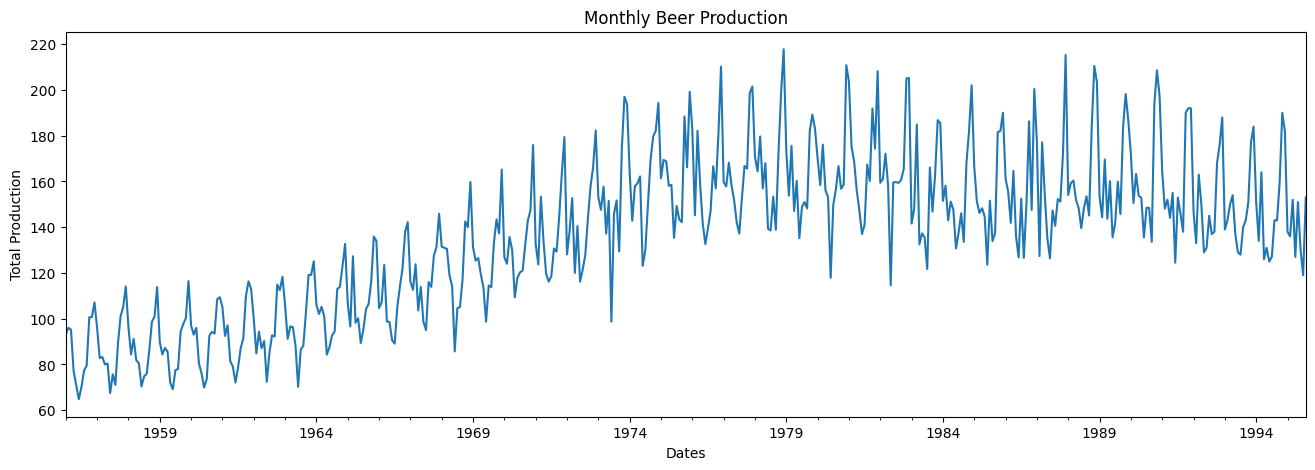

In [ ]:
ax = df['Monthly beer production'].plot(figsize = (16,5), title = "Monthly Beer Production")
ax.set(xlabel='Dates', ylabel='Total Production');

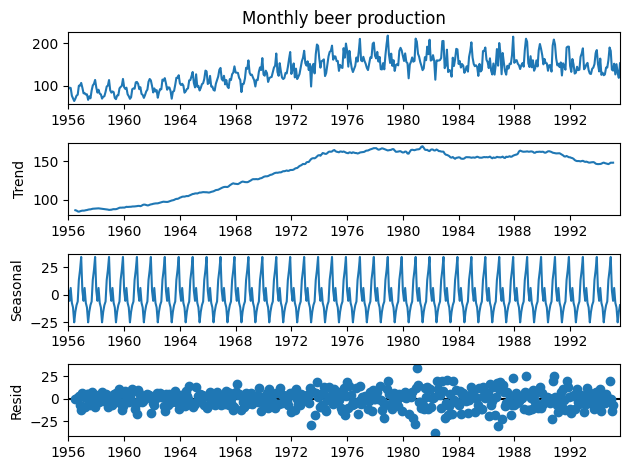

In [16]:
a = seasonal_decompose(df["Monthly beer production"], model = "add")
a.plot();

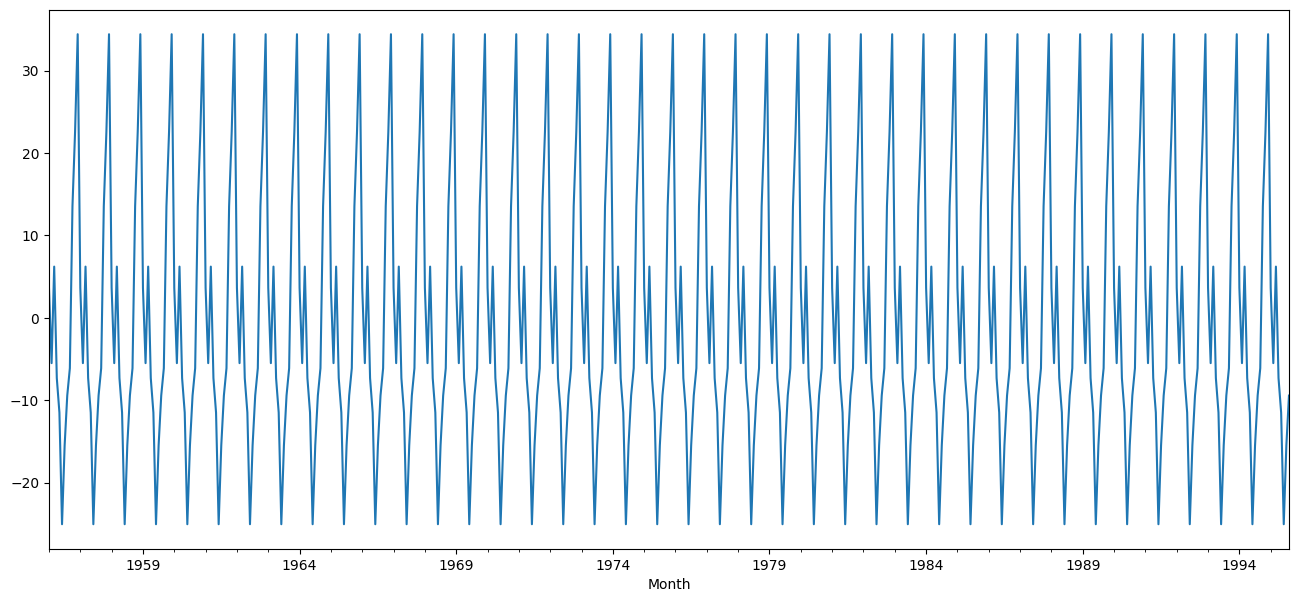

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
a.seasonal.plot();

In [18]:
auto_arima(df['Monthly beer production'], seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  476
Model:             SARIMAX(2, 1, 3)x(3, 0, [1], 12)   Log Likelihood               -1736.210
Date:                              Mon, 24 Jul 2023   AIC                           3492.421
Time:                                      08:04:22   BIC                           3534.054
Sample:                                  01-01-1956   HQIC                          3508.793
                                       - 08-01-1995                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1521      0.004   -295.243      0.000      -1.160      -1.144
ar.L2         -0.9961      0.004   -225.046      0.000      -1.005      -0.987
ma.L1          0.2376      0.026      9.287      0.000       0.187       0.288
ma.L2         -0.0100      0.025     -0.399      0.690      -0.059       0.039
ma.L3         -0.8631      0.023    -37.349      0.000      -0.908      -0.818
ar.S.L12       1.0254      0.073     14.123      0.000       0.883       1.168
ar.S.L24      -0.0213      0.055     -0.390      0.697      -0.129       0.086
ar.S.L36      -0.0086      0.058     -0.147      0.883      -0.122       0.105
ma.S.L12      -0.8338      0.057    -14.667      0.000      -0.945      -0.722
sigma2        82.5192      4.569     18.062      0.000      73.565      91.474
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                35.05
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               3.30   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]

In [21]:
arima_model = SARIMAX(train_data['Monthly beer production'], order = (2,1,1), seasonal_order = (4,0,3,12))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                    Monthly beer production   No. Observations:                  464
Model:             SARIMAX(2, 1, 1)x(4, 0, [1, 2, 3], 12)   Log Likelihood               -1707.906
Date:                                    Mon, 24 Jul 2023   AIC                           3437.811
Time:                                            09:12:45   BIC                           3483.326
Sample:                                        01-01-1956   HQIC                          3455.729
                                             - 08-01-1994                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1287      0.043     -2.986      0.003      -0.213      -0.044
ar.L2         -0.1705      0.045     -3.749      0.000      -0.260      -0.081
ma.L1         -0.8389      0.029    -28.944      0.000      -0.896      -0.782
ar.S.L12       1.7595      0.121     14.552      0.000       1.522       1.996
ar.S.L24      -1.6164      0.234     -6.915      0.000      -2.075      -1.158
ar.S.L36       0.7886      0.182      4.324      0.000       0.431       1.146
ar.S.L48       0.0670      0.065      1.026      0.305      -0.061       0.195
ma.S.L12      -1.5668      0.132    -11.839      0.000      -1.826      -1.307
ma.S.L24       1.4030      0.223      6.287      0.000       0.966       1.840
ma.S.L36      -0.6597      0.129     -5.118      0.000      -0.912      -0.407
sigma2        85.4435      5.108     16.727      0.000      75.432      95.455
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                41.00
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               4.07   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

1994-09-01    133.760053
1994-10-01    157.981626
1994-11-01    182.071590
1994-12-01    183.489464
1995-01-01    144.753538
1995-02-01    136.721882
1995-03-01    151.028379
1995-04-01    133.076618
1995-05-01    137.862327
1995-06-01    120.481980
1995-07-01    128.450607
1995-08-01    138.704919
Freq: MS, Name: ARIMA Predictions, dtype: float64

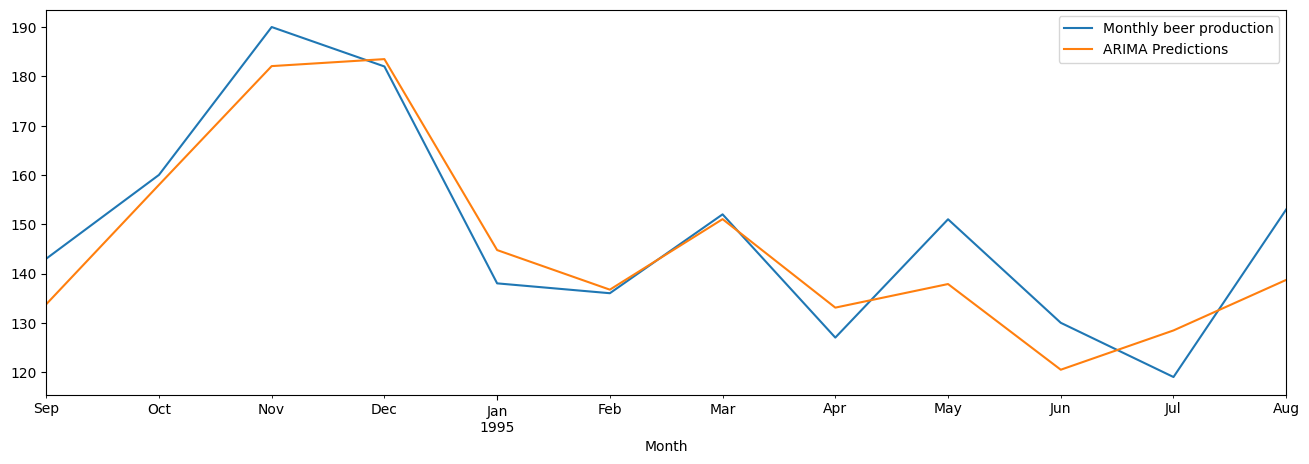

In [23]:
test_data['Monthly beer production'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [24]:
arima_rmse_error = rmse(test_data['Monthly beer production'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['Monthly beer production'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 66.28198831550976
RMSE Error: 8.141375087508852
Mean: 136.3953781512605


In [25]:
test_data['ARIMA_Predictions'] = arima_pred

In [26]:
test_data

,Monthly beer production,ARIMA_Predictions
Month,,
1994-09-01,143.0,133.760053
1994-10-01,160.0,157.981626
1994-11-01,190.0,182.071590
1994-12-01,182.0,183.489464
1995-01-01,138.0,144.753538
1995-02-01,136.0,136.721882
1995-03-01,152.0,151.028379
1995-04-01,127.0,133.076618
1995-05-01,151.0,137.862327


In [ ]:
------------------------++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++